In [5]:
# importing pandas library
import pandas as pd

In [6]:
# load data file
df = pd.read_excel('data/Median Household Income - 2022.xlsx')

In [7]:
df.shape

(258, 4)

In [8]:
df.head(10)

name  year  denom_total_hh  Median Household Income
0              Irwindale  2022          515.49                100062.67
1             Pico-Union  2022        13609.79                 46325.61
2               Glendora  2022        17244.75                111736.00
3               Industry  2022         3603.74                100091.73
4                 Sylmar  2022        22430.98                 91758.07
5               Torrance  2022        59549.76                111154.92
6               Alhambra  2022        31989.32                 83391.57
7            Pico Rivera  2022        17330.63                 81487.08
8  Rolling Hills Estates  2022         3813.86                186764.23
9            Signal Hill  2022         5036.72                 92473.93

In [9]:
# we only really need name and Median Household Income, so let's subset the data
df = df[['name','Median Household Income']]
df.head(10)

name  Median Household Income
0              Irwindale                100062.67
1             Pico-Union                 46325.61
2               Glendora                111736.00
3               Industry                100091.73
4                 Sylmar                 91758.07
5               Torrance                111154.92
6               Alhambra                 83391.57
7            Pico Rivera                 81487.08
8  Rolling Hills Estates                186764.23
9            Signal Hill                 92473.93

In [10]:
import geopandas as gpd

In [11]:
# read in a geojson file downloaded from the LA Times
neighborhoods=gpd.read_file('data/LA_Times_Neighborhood_Boundaries.geojson')
neighborhoods.head(10)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


OBJECTID                    name  \
0         1         Adams-Normandie   
1         2                  Arleta   
2         3       Arlington Heights   
3         4         Atwater Village   
4         5  Baldwin Hills/Crenshaw   
5         6                 Bel-Air   
6         7           Beverly Crest   
7         8           Beverly Grove   
8         9             Beverlywood   
9        10           Boyle Heights   

                                            geometry  
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...  
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...  
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...  
3  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...  
4  POLYGON ((-118.36102 34.02532, -118.36026 34.0...  
5  POLYGON ((-118.46165 34.13077, -118.46077 34.1...  
6  POLYGON ((-118.42910 34.07920, -118.42929 34.0...  
7  POLYGON ((-118.37251 34.09026, -118.37250 34.0...  
8  POLYGON ((-118.38609 34.04675, -118.38934 34.0...  
9  POLYGON ((-118.19263 34.06077, -118.19260 34.0...

In [12]:
neighborhoods.shape

(114, 3)

In [13]:
# we only really need name and geometry, so let's subset the data
neighborhoods = neighborhoods[['name','geometry']]
neighborhoods.head(10)

name                                           geometry
0         Adams-Normandie  POLYGON ((-118.30069 34.03731, -118.30388 34.0...
1                  Arleta  POLYGON ((-118.44255 34.26412, -118.44240 34.2...
2       Arlington Heights  POLYGON ((-118.31862 34.05306, -118.31673 34.0...
3         Atwater Village  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...
4  Baldwin Hills/Crenshaw  POLYGON ((-118.36102 34.02532, -118.36026 34.0...
5                 Bel-Air  POLYGON ((-118.46165 34.13077, -118.46077 34.1...
6           Beverly Crest  POLYGON ((-118.42910 34.07920, -118.42929 34.0...
7           Beverly Grove  POLYGON ((-118.37251 34.09026, -118.37250 34.0...
8             Beverlywood  POLYGON ((-118.38609 34.04675, -118.38934 34.0...
9           Boyle Heights  POLYGON ((-118.19263 34.06077, -118.19260 34.0...

<Axes: >

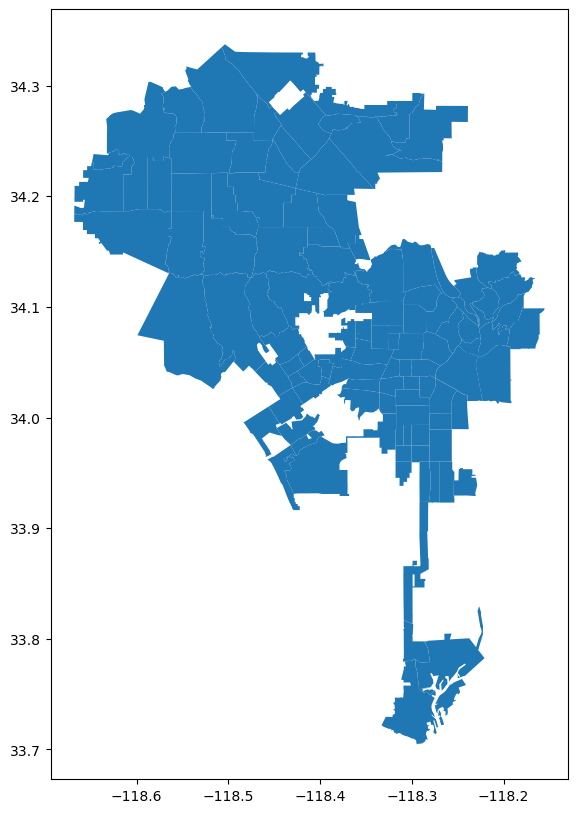

In [14]:
# plot it!
neighborhoods.plot(figsize=(12,10))

In [15]:
# tell me more about this dataset
neighborhoods.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      114 non-null    object  
 1   geometry  114 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 1.9+ KB


In [16]:
# create a new dataframe based on the joining by neighborhoods
neighborhoods_income=neighborhoods.merge(df,on="name")

In [17]:
# what does it look like now?
neighborhoods_income.head(10)

name                                           geometry  \
0         Adams-Normandie  POLYGON ((-118.30069 34.03731, -118.30388 34.0...   
1                  Arleta  POLYGON ((-118.44255 34.26412, -118.44240 34.2...   
2       Arlington Heights  POLYGON ((-118.31862 34.05306, -118.31673 34.0...   
3         Atwater Village  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...   
4  Baldwin Hills/Crenshaw  POLYGON ((-118.36102 34.02532, -118.36026 34.0...   
5                 Bel-Air  POLYGON ((-118.46165 34.13077, -118.46077 34.1...   
6           Beverly Crest  POLYGON ((-118.42910 34.07920, -118.42929 34.0...   
7           Beverly Grove  POLYGON ((-118.37251 34.09026, -118.37250 34.0...   
8             Beverlywood  POLYGON ((-118.38609 34.04675, -118.38934 34.0...   
9           Boyle Heights  POLYGON ((-118.19263 34.06077, -118.19260 34.0...   

   Median Household Income  
0                 47235.38  
1                 92989.90  
2                 50446.74  
3                 95033.06  
4                 65108.68  
5                198222.17  
6                210524.64  
7                113333.95  
8                174437.77  
9                 55067.92

In [18]:
neighborhoods_income.shape

(110, 3)

In [19]:
# verbose shows all the columns, show_counts shows the number of non-null values
neighborhoods_income.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   name                     110 non-null    object  
 1   geometry                 110 non-null    geometry
 2   Median Household Income  110 non-null    float64 
dtypes: float64(1), geometry(1), object(1)
memory usage: 2.7+ KB


In [20]:
neighborhoods_income.columns = ['Neighborhood',
'geometry',
'Median Household Income ($)']

In [21]:
neighborhoods_income.head(10)

Neighborhood                                           geometry  \
0         Adams-Normandie  POLYGON ((-118.30069 34.03731, -118.30388 34.0...   
1                  Arleta  POLYGON ((-118.44255 34.26412, -118.44240 34.2...   
2       Arlington Heights  POLYGON ((-118.31862 34.05306, -118.31673 34.0...   
3         Atwater Village  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...   
4  Baldwin Hills/Crenshaw  POLYGON ((-118.36102 34.02532, -118.36026 34.0...   
5                 Bel-Air  POLYGON ((-118.46165 34.13077, -118.46077 34.1...   
6           Beverly Crest  POLYGON ((-118.42910 34.07920, -118.42929 34.0...   
7           Beverly Grove  POLYGON ((-118.37251 34.09026, -118.37250 34.0...   
8             Beverlywood  POLYGON ((-118.38609 34.04675, -118.38934 34.0...   
9           Boyle Heights  POLYGON ((-118.19263 34.06077, -118.19260 34.0...   

   Median Household Income ($)  
0                     47235.38  
1                     92989.90  
2                     50446.74  
3                     95033.06  
4                     65108.68  
5                    198222.17  
6                    210524.64  
7                    113333.95  
8                    174437.77  
9                     55067.92

In [22]:
import folium

In [23]:
m = folium.Map(location=[34.0549, -118.2426], zoom_start=10, tiles='CartoDB positron', attribution='CartoDB')
m

In [24]:
folium.Choropleth(
    geo_data=neighborhoods_income,  # GeoDataFrame containing geometrical information
    data=neighborhoods_income,  # Data to visualize
    key_on='feature.properties.Neighborhood',  # Key for the neighborhood name
    columns=['Neighborhood', 'Median Household Income ($)'],  # Columns to use for mapping (identifier column and value)
    fill_color='RdBu',
    line_weight=0.1,
    fill_opacity=0.7,
    line_opacity=0.8,
    legend_name='Median Household Income ($)'
).add_to(m)
m

In [25]:
# Add GeoJson layer with pop-ups
folium.GeoJson(
    neighborhoods_income,
    name='geojson',
    tooltip=folium.features.GeoJsonTooltip(fields=['Neighborhood', 'Median Household Income ($)'],
                                           aliases=['Neighborhood', 'Median Income ($)'],
                                           localize=True,
                                           style="background-color: white; border: 1px solid black; padding: 10px;",
                                           labels=True,
                                           sticky=True,
                                           toLocaleString=True),
    style_function=lambda x: {
        'color': 'transparent',  # No boundary color
        'fillColor': 'transparent'  # No fill color
    },
    highlight_function=lambda x: {'weight': 1, 'color': 'red'},  # Highlight on hover
    smooth_factor=2.0
).add_to(m)

m

In [26]:
# Get bounds of the color-shaded areas
bounds = m.get_bounds()

In [27]:
# Fit the map to the bounds
m.fit_bounds(bounds)
m

In [34]:
# Save the map as a screenshot image
m.save("interactive_income_map.html")